In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
tf.__version__

'2.0.0-alpha0'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Loading data

In [3]:
fashion_mnist = datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### Exploring data a bit

In [5]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
print(train_images[0].shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(28, 28)


In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

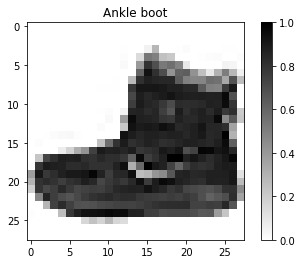

In [8]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.title(class_names[train_labels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

#### Create Model

In [10]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64, (3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64,(3,3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

In [11]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [12]:
model1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
model1_history = model1.fit(train_images, 
          train_labels, 
          epochs=5)

Epoch 1/5
60000/60000 [==============================] - 15s 256us/sample - loss: 0.4943 - accuracy: 0.8175
Epoch 2/5
60000/60000 [==============================] - 14s 229us/sample - loss: 0.3177 - accuracy: 0.8837
Epoch 3/5
60000/60000 [==============================] - 14s 231us/sample - loss: 0.2740 - accuracy: 0.9004
Epoch 4/5
60000/60000 [==============================] - 14s 231us/sample - loss: 0.2447 - accuracy: 0.9105
Epoch 5/5
60000/60000 [==============================] - 14s 233us/sample - loss: 0.2199 - accuracy: 0.9182


In [16]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 113us/sample - loss: 0.2702 - accuracy: 0.9019


In [17]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(64,(3,3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [18]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [38]:
model2.compile(optimizer=tf.keras.optimizers.Adam(
               learning_rate=0.001,
               beta_1=0.9,
               beta_2=0.999,
               epsilon=1e-07),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [34]:
model2_history = model2.fit(train_images, 
                  train_labels, 
                  epochs=5,
                  batch_size=32,
                  verbose=1)

Epoch 1/5
60000/60000 [==============================] - 15s 244us/sample - loss: 0.2068 - accuracy: 0.9236
Epoch 2/5
60000/60000 [==============================] - 14s 230us/sample - loss: 0.1886 - accuracy: 0.9306
Epoch 3/5
60000/60000 [==============================] - 13s 220us/sample - loss: 0.1729 - accuracy: 0.9349
Epoch 4/5
60000/60000 [==============================] - 13s 223us/sample - loss: 0.1583 - accuracy: 0.9402
Epoch 5/5
60000/60000 [==============================] - 13s 223us/sample - loss: 0.1466 - accuracy: 0.9457


In [28]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 113us/sample - loss: 0.2683 - accuracy: 0.9042


In [32]:
def plot_history(history):
    loss = plt.plot(history.epoch)

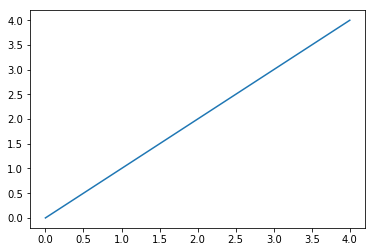

In [33]:
plot_history(model2_history)

In [35]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(64, (3,3), activation='relu'))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(64,(3,3), activation='relu'))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))

In [37]:
model3.compile(optimizer=tf.keras.optimizers.Adam(
               learning_rate=0.01,
               beta_1=0.9,
               beta_2=0.999,
               epsilon=1e-07),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [39]:
model3_history = model3.fit(train_images, 
                  train_labels, 
                  epochs=5,
                  batch_size=32,
                  verbose=1)

Epoch 1/5
60000/60000 [==============================] - 14s 232us/sample - loss: 0.5161 - accuracy: 0.8066
Epoch 2/5
60000/60000 [==============================] - 14s 229us/sample - loss: 0.4117 - accuracy: 0.8472
Epoch 3/5
60000/60000 [==============================] - 14s 228us/sample - loss: 0.3961 - accuracy: 0.8546
Epoch 4/5
60000/60000 [==============================] - 14s 229us/sample - loss: 0.3852 - accuracy: 0.8592
Epoch 5/5
60000/60000 [==============================] - 14s 229us/sample - loss: 0.3794 - accuracy: 0.8623


In [43]:
test_loss, test_acc = model3.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 113us/sample - loss: 0.4147 - accuracy: 0.8496


In [40]:
model4 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [41]:
model4.compile(optimizer=tf.keras.optimizers.Adam(
               learning_rate=0.003,
               beta_1=0.9,
               beta_2=0.999,
               epsilon=1e-07),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [42]:
model4_history = model4.fit(train_images, 
                  train_labels, 
                  epochs=5,
                  batch_size=32,
                  verbose=1)

Epoch 1/5
60000/60000 [==============================] - 14s 234us/sample - loss: 0.4613 - accuracy: 0.8298
Epoch 2/5
60000/60000 [==============================] - 14s 229us/sample - loss: 0.3157 - accuracy: 0.8824
Epoch 3/5
60000/60000 [==============================] - 14s 232us/sample - loss: 0.2800 - accuracy: 0.8971
Epoch 4/5
60000/60000 [==============================] - 14s 232us/sample - loss: 0.2614 - accuracy: 0.9034
Epoch 5/5
60000/60000 [==============================] - 14s 233us/sample - loss: 0.2405 - accuracy: 0.9113


In [44]:
test_loss, test_acc = model4.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 113us/sample - loss: 0.3187 - accuracy: 0.8868


In [45]:
model5 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [46]:
model5.compile(optimizer=tf.keras.optimizers.Adam(
               learning_rate=0.001,
               beta_1=0.9,
               beta_2=0.999,
               epsilon=1e-07),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [47]:
model5_history = model5.fit(train_images, 
                  train_labels, 
                  epochs=5,
                  batch_size=32,
                  verbose=1)

Epoch 1/5
60000/60000 [==============================] - 14s 235us/sample - loss: 0.5116 - accuracy: 0.8130
Epoch 2/5
60000/60000 [==============================] - 14s 232us/sample - loss: 0.3268 - accuracy: 0.8813
Epoch 3/5
60000/60000 [==============================] - 14s 232us/sample - loss: 0.2786 - accuracy: 0.8982
Epoch 4/5
60000/60000 [==============================] - 14s 231us/sample - loss: 0.2481 - accuracy: 0.9087
Epoch 5/5
60000/60000 [==============================] - 14s 232us/sample - loss: 0.2248 - accuracy: 0.9171


In [48]:
test_loss, test_acc = model5.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 118us/sample - loss: 0.2637 - accuracy: 0.9051


In [49]:
model6 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [50]:
model6.compile(optimizer=tf.keras.optimizers.Adam(
               learning_rate=0.001,
               beta_1=0.9,
               beta_2=0.999,
               epsilon=1e-07),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [51]:
model6_history = model6.fit(train_images, 
                  train_labels, 
                  epochs=5,
                  batch_size=64,
                  verbose=1)

Epoch 1/5
60000/60000 [==============================] - 9s 144us/sample - loss: 0.5537 - accuracy: 0.7973
Epoch 2/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.3480 - accuracy: 0.8732
Epoch 3/5
60000/60000 [==============================] - 8s 141us/sample - loss: 0.2966 - accuracy: 0.8916
Epoch 4/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.2691 - accuracy: 0.9005
Epoch 5/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.2456 - accuracy: 0.9096


In [52]:
test_loss, test_acc = model6.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 112us/sample - loss: 0.2786 - accuracy: 0.8990


In [53]:
model7 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model7.compile(optimizer=tf.keras.optimizers.Adam(
               learning_rate=0.0008,
               beta_1=0.9,
               beta_2=0.999,
               epsilon=1e-07),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model7_history = model7.fit(train_images, 
                  train_labels, 
                  epochs=5,
                  batch_size=32,
                  verbose=1)

test_loss, test_acc = model7.evaluate(test_images, test_labels)

Epoch 1/5
60000/60000 [==============================] - 15s 249us/sample - loss: 0.5046 - accuracy: 0.8139
Epoch 2/5
60000/60000 [==============================] - 14s 232us/sample - loss: 0.3229 - accuracy: 0.8830
Epoch 3/5
60000/60000 [==============================] - 14s 233us/sample - loss: 0.2758 - accuracy: 0.8998
Epoch 4/5
60000/60000 [==============================] - 14s 233us/sample - loss: 0.2451 - accuracy: 0.9096
Epoch 5/5
10000/10000 [==============================] - 1s 110us/sample - loss: 0.2643 - accuracy: 0.9049


In [54]:
model8 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model8.compile(optimizer=tf.keras.optimizers.Adam(
               learning_rate=0.001,
               beta_1=0.9,
               beta_2=0.999,
               epsilon=1e-07),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model8_history = model8.fit(train_images, 
                  train_labels, 
                  epochs=5,
                  batch_size=16,
                  verbose=1)

test_loss, test_acc = model8.evaluate(test_images, test_labels)

Epoch 1/5
60000/60000 [==============================] - 25s 423us/sample - loss: 0.4624 - accuracy: 0.8291
Epoch 2/5
60000/60000 [==============================] - 24s 402us/sample - loss: 0.3070 - accuracy: 0.8873
Epoch 3/5
60000/60000 [==============================] - 24s 401us/sample - loss: 0.2624 - accuracy: 0.9022
Epoch 4/5
60000/60000 [==============================] - 24s 402us/sample - loss: 0.2330 - accuracy: 0.9123
Epoch 5/5
10000/10000 [==============================] - 1s 114us/sample - loss: 0.2572 - accuracy: 0.9080


In [56]:
model9 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model9.compile(optimizer=tf.keras.optimizers.Adam(
               learning_rate=0.001,
               beta_1=0.9,
               beta_2=0.999,
               epsilon=1e-07),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model_history9 = model9.fit(train_images, 
                  train_labels, 
                  epochs=20,
                  batch_size=32,
                  verbose=1)

test_loss, test_acc = model9.evaluate(test_images, test_labels)

Epoch 1/20
60000/60000 [==============================] - 15s 248us/sample - loss: 0.5018 - accuracy: 0.8145
Epoch 2/20
60000/60000 [==============================] - 14s 233us/sample - loss: 0.3178 - accuracy: 0.8840
Epoch 3/20
60000/60000 [==============================] - 14s 228us/sample - loss: 0.2702 - accuracy: 0.9008
Epoch 4/20
60000/60000 [==============================] - 14s 228us/sample - loss: 0.2440 - accuracy: 0.9097
Epoch 5/20
60000/60000 [==============================] - 14s 229us/sample - loss: 0.2210 - accuracy: 0.9188
Epoch 6/20
60000/60000 [==============================] - 14s 228us/sample - loss: 0.1982 - accuracy: 0.9261
Epoch 7/20
60000/60000 [==============================] - 14s 229us/sample - loss: 0.1827 - accuracy: 0.9313
Epoch 8/20
60000/60000 [==============================] - 14s 229us/sample - loss: 0.1677 - accuracy: 0.9376
Epoch 9/20
60000/60000 [==============================] - 14s 226us/sample - loss: 0.1546 - accuracy: 0.9425
Epoch 10/20
60000/6

###### Model is overfitting.  Will try adding regularization

In [10]:
model10 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model10.compile(optimizer=tf.keras.optimizers.Adam(
               learning_rate=0.001,
               beta_1=0.9,
               beta_2=0.999,
               epsilon=1e-07),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model_history10 = model10.fit(train_images, 
                  train_labels, 
                  epochs=20,
                  batch_size=32,
                  verbose=1)

test_loss, test_acc = model10.evaluate(test_images, test_labels)

Epoch 1/20
60000/60000 [==============================] - 19s 315us/sample - loss: 0.3891 - accuracy: 0.8598
Epoch 2/20
60000/60000 [==============================] - 17s 283us/sample - loss: 0.2761 - accuracy: 0.8970
Epoch 3/20
60000/60000 [==============================] - 17s 279us/sample - loss: 0.2342 - accuracy: 0.9133
Epoch 4/20
60000/60000 [==============================] - 17s 277us/sample - loss: 0.2073 - accuracy: 0.9224
Epoch 5/20
60000/60000 [==============================] - 17s 278us/sample - loss: 0.1867 - accuracy: 0.9299
Epoch 6/20
60000/60000 [==============================] - 17s 278us/sample - loss: 0.1637 - accuracy: 0.9384
Epoch 7/20
60000/60000 [==============================] - 17s 279us/sample - loss: 0.1492 - accuracy: 0.9434
Epoch 8/20
60000/60000 [==============================] - 17s 280us/sample - loss: 0.1335 - accuracy: 0.9493
Epoch 9/20
60000/60000 [==============================] - 17s 277us/sample - loss: 0.1210 - accuracy: 0.9547
Epoch 10/20
60000/6

In [12]:
model11 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model11.compile(optimizer=tf.keras.optimizers.Adam(
               learning_rate=0.001,
               beta_1=0.9,
               beta_2=0.999,
               epsilon=1e-07),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model_history11 = model11.fit(train_images, 
                  train_labels, 
                  epochs=20,
                  batch_size=32,
                  verbose=1)

test_loss, test_acc = model11.evaluate(test_images, test_labels)

Epoch 1/20
60000/60000 [==============================] - 20s 332us/sample - loss: 0.4742 - accuracy: 0.8268
Epoch 2/20
60000/60000 [==============================] - 19s 319us/sample - loss: 0.3444 - accuracy: 0.8737
Epoch 3/20
60000/60000 [==============================] - 19s 324us/sample - loss: 0.3035 - accuracy: 0.8888
Epoch 4/20
60000/60000 [==============================] - 20s 326us/sample - loss: 0.2740 - accuracy: 0.8982
Epoch 5/20
60000/60000 [==============================] - 21s 354us/sample - loss: 0.2519 - accuracy: 0.9065
Epoch 6/20
60000/60000 [==============================] - 23s 390us/sample - loss: 0.2321 - accuracy: 0.9131
Epoch 7/20
60000/60000 [==============================] - 19s 325us/sample - loss: 0.2175 - accuracy: 0.9196
Epoch 8/20
60000/60000 [==============================] - 19s 325us/sample - loss: 0.2030 - accuracy: 0.9240
Epoch 9/20
60000/60000 [==============================] - 19s 323us/sample - loss: 0.1906 - accuracy: 0.9283
Epoch 10/20
60000/6